<br />
<br />
<br />


## Wisconsin Breast Cancer dataset

Repeat what we did in the class for the Wisconsin Breast Cancer dataset we used on Day 1. 

In [1]:
from sklearn.datasets import load_breast_cancer
bcancer = load_breast_cancer()

In [2]:
bcancer.data.shape

(569, 30)

In [3]:
bcancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### 0) Split out the test data first.

In [4]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, Y_train, Y_test  = train_test_split( 
                bcancer.data, bcancer.target, test_size=0.2,
                shuffle=True) 
print("Shape of the train dataset", X_train.shape)
print("Shape of the test dataset", X_test.shape)

Shape of the train dataset (455, 30)
Shape of the test dataset (114, 30)


### 1) Fit a random forest using this data.

In [6]:
clf = RandomForestClassifier( n_estimators = 50, 
                            max_depth = 5, oob_score = True )
clf.fit( X_train, Y_train )
print("Out of bag score",clf.oob_score_)

Out of bag score 0.967032967032967


In [7]:
#print("Accuracy score: ",clf.score(features,labels))
#print("Features importance: ",clf.feature_importances_) 

### 2) Choose hyperparameter `max_depth` using the validation set method. 

In [8]:
X_train1, X_valid, Y_train1, Y_valid = train_test_split( 
        X_train, Y_train, test_size=0.33,shuffle=False)

In [9]:
max_depths = [10,20,30,40,50]
for depth in max_depths:
    clf = RandomForestClassifier(n_estimators=50, max_depth=depth,oob_score=False)
    clf.fit(X_train1, Y_train1)
    print('Score for the value of max_depth,',depth,', is: ',clf.score(X_valid, Y_valid))

Score for the value of max_depth, 10 , is:  0.9801324503311258
Score for the value of max_depth, 20 , is:  0.9668874172185431
Score for the value of max_depth, 30 , is:  0.9668874172185431
Score for the value of max_depth, 40 , is:  0.9867549668874173
Score for the value of max_depth, 50 , is:  0.9668874172185431


### 3) Choose hyperparameter `max_depth` using 4-fold cross validation.

In [10]:
from sklearn.svm import SVC
kf = KFold(n_splits=4)
max_depths = [10,20,30,40,50]

for depth in max_depths:
    for train_index, valid_index in kf.split( X_train ):
        a = X_train[train_index]
        b  = X_train[valid_index]
        c = Y_train[train_index]
        d  = Y_train[valid_index]
    
        clf = SVC( C = 1., gamma = 0.5 )
        clf.fit( a, c )
        print( clf.score(b, d) )
        print('Score for the value of max_depth,',depth,', is: ',clf.score(b,d))

0.6578947368421053
Score for the value of max_depth, 10 , is:  0.6578947368421053
0.5701754385964912
Score for the value of max_depth, 10 , is:  0.5701754385964912
0.5789473684210527
Score for the value of max_depth, 10 , is:  0.5789473684210527
0.6991150442477876
Score for the value of max_depth, 10 , is:  0.6991150442477876
0.6578947368421053
Score for the value of max_depth, 20 , is:  0.6578947368421053
0.5701754385964912
Score for the value of max_depth, 20 , is:  0.5701754385964912
0.5789473684210527
Score for the value of max_depth, 20 , is:  0.5789473684210527
0.6991150442477876
Score for the value of max_depth, 20 , is:  0.6991150442477876
0.6578947368421053
Score for the value of max_depth, 30 , is:  0.6578947368421053
0.5701754385964912
Score for the value of max_depth, 30 , is:  0.5701754385964912
0.5789473684210527
Score for the value of max_depth, 30 , is:  0.5789473684210527
0.6991150442477876
Score for the value of max_depth, 30 , is:  0.6991150442477876
0.65789473684210

### 4) Check the final performance with the test set.

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [12]:
clf = RandomForestClassifier( n_estimators = 50 )
clf.fit( X_train, Y_train )

print("Accuracy: ", accuracy_score(Y_test, clf.predict(X_test)))
print("Precision: ", precision_score(Y_test, clf.predict(X_test)))
print("Recall: ", recall_score(Y_test, clf.predict(X_test)))
print("F1-score: ", f1_score(Y_test, clf.predict(X_test)))

Accuracy:  0.9473684210526315
Precision:  0.9583333333333334
Recall:  0.9583333333333334
F1-score:  0.9583333333333334


In [13]:
clf = SVC( C = 1., gamma = 0.5)
clf.fit( X_train, Y_train)        
        
print("Accuracy: ", accuracy_score(Y_test, clf.predict(X_test)))
print("Precision: ", precision_score(Y_test, clf.predict(X_test)))
print("Recall: ", recall_score(Y_test, clf.predict(X_test)))
print("F1-score: ", f1_score(Y_test, clf.predict(X_test)))

Accuracy:  0.631578947368421
Precision:  0.631578947368421
Recall:  1.0
F1-score:  0.7741935483870968


## Exercise 2: Banana dataset

The banana dataset is included in this directory in `banana_dataset.csv`. The first column contains labels, and the remaining columns are two features. This is a comma-separated file, so you will need to use the keyword parameter `delimiter=','` in `np.loadtxt()`.  

### 0) Read in the data, and split out the test data.

In [14]:
import numpy as np
bdataset = np.loadtxt("banana_dataset.csv", delimiter=',')
print("Shape of the bdataset: ", bdataset.shape )

Shape of the bdataset:  (300, 3)


In [15]:
bfeat = bdataset[:,1:]
blabl = bdataset[:,0]

In [16]:
features, features_test, labels, labels_test = train_test_split( 
                bfeat, blabl, test_size=0.2,
                shuffle=True) 

### 1) Fit a support vector classifier with this data. 

In [17]:
from sklearn.svm import SVC

In [18]:
clf = SVC()
clf.fit( features, labels )
print( clf.score( features, labels ) )

0.9375


In [19]:
clf = SVC(gamma=10000.)
clf.fit( features, labels )
print( clf.score( features, labels ) )

1.0


In [20]:
import matplotlib.pyplot as plt
def plotContours(clf, delta = 0.01):
    
    x     = np.arange(-2.0, 5.001, delta)
    y     = np.arange(-2.0, 5.001, delta)

    X, Y = np.meshgrid(x, y)
    Z    = clf.predict( np.c_[X.ravel(), Y.ravel()] )
    Z    = Z.reshape( X.shape )

    plt.contourf( X, Y, Z, cmap=plt.get_cmap('jet'))

    plt.xlabel('X1')
    plt.ylabel('X2')

    plt.show()

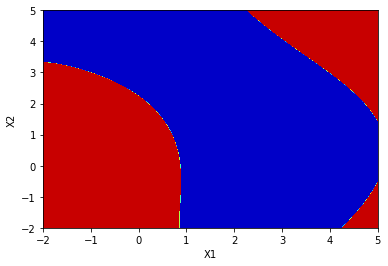

In [21]:
clf = SVC()
clf.fit( features, labels )
plotContours(clf)

### 2) Choose hyperparameters $\gamma$ and $C$ using validation set. 

In [22]:
features_train, features_valid, labels_train, labels_valid = train_test_split( 
        features, labels, test_size=0.33, shuffle=False)

In [23]:
print("Shape of the train dataset: ", features_train.shape)
print("Shape of the validation dataset: ", features_valid.shape)

Shape of the train dataset:  (160, 2)
Shape of the validation dataset:  (80, 2)


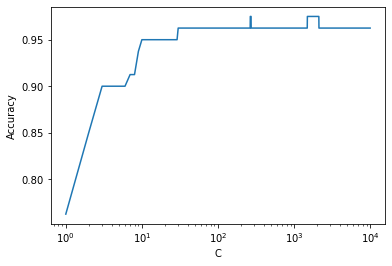

In [24]:
Cvalue = range (1,10000)

accuracies = []
for C in Cvalue:
    clf = SVC( C = C )
    clf.fit( features_train, labels_train )
    accuracies.append( clf.score(features_valid, labels_valid) )

plt.plot(Cvalue, accuracies)

plt.ylabel(r'Accuracy') # r'': raw string. backslashes mean backslashes, not escaping.
plt.xlabel(r'C')
plt.xscale('log')

plt.show()
# we got the highest accuracy at C=100

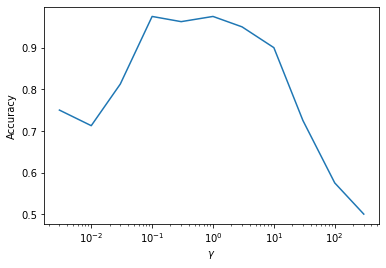

In [25]:
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 10., gamma = gamma )
    clf.fit( features_train, labels_train )
    accuracies.append( clf.score(features_valid, labels_valid) )

plt.plot(setGammas, accuracies)

plt.ylabel(r'Accuracy') # r'': raw string. backslashes mean backslashes, not escaping.
plt.xlabel(r'$\gamma$')
plt.xscale('log')

plt.show()
# we got the highest accuracy at gamma=1

In [26]:
numRepetitions = 100
accuracies = np.zeros( numRepetitions )

for j in range(numRepetitions):
    features_train, features_valid, labels_train, labels_valid = train_test_split( features, labels, 
                                                            test_size=0.33)
    clf = SVC( C = 10., gamma = 1. )
    clf.fit( features_train, labels_train )
    accuracies[j] = clf.score(features_valid, labels_valid)

print(r"Average accuracy (gamma = 0.5): ", accuracies.mean() )

Average accuracy (gamma = 0.5):  0.973875


### 3) Choose hyperparameters $\gamma$ and $C$ using 4-fold cross validation.

In [27]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)

In [28]:
for train_index, valid_index in kf.split( features ):
    features_train_kfold = features[train_index]
    features_valid_kfold  = features[valid_index]
    labels_train_kfold = labels[train_index]
    labels_valid_kfold  = labels[valid_index]
    
clf.fit( features_train_kfold, labels_train_kfold )

SVC(C=10.0, gamma=1.0)

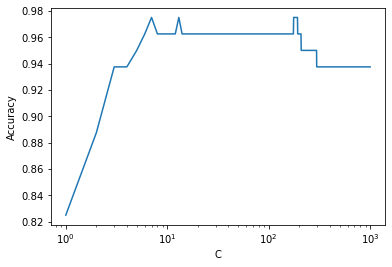

In [29]:
Cvalue = range (1, 1000)

accuracies = []
for C in Cvalue:
    clf = SVC( C = C )
    clf.fit( features_train, labels_train )
    accuracies.append( clf.score(features_valid, labels_valid) )

plt.plot(Cvalue, accuracies)

plt.ylabel(r'Accuracy') # r'': raw string. backslashes mean backslashes, not escaping.
plt.xlabel(r'C')
plt.xscale('log')

plt.show()
# we got the highest accuracy at C=50

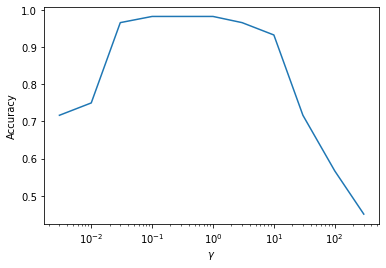

In [30]:
setGammas = np.array( [0.003,0.01,0.03,0.1,0.3,1.0,3.,10.,30.,100.,300] )

accuracies = []
for gamma in setGammas:
    clf = SVC( C = 50., gamma = gamma )
    clf.fit( features_train_kfold, labels_train_kfold )
    accuracies.append( clf.score(features_valid_kfold, labels_valid_kfold) )

plt.plot(setGammas, accuracies)

plt.ylabel(r'Accuracy') # r'': raw string. backslashes mean backslashes, not escaping.
plt.xlabel(r'$\gamma$')
plt.xscale('log')

plt.show()
# we got the highest accuracy at gamma=0.5

In [31]:
numRepetitions = 100
accuracies = np.zeros( numRepetitions )

for j in range(numRepetitions):
    features_train_kfold, features_valid_kfold, labels_train_kfold, labels_valid_kfold = train_test_split( features, labels, 
                                                            test_size=0.33)
    clf = SVC( C = 50., gamma = 0.5 )
    clf.fit( features_train_kfold, labels_train_kfold )
    accuracies[j] = clf.score(features_valid_kfold, labels_valid_kfold)

print(r"Average accuracy (gamma = 5): ", accuracies.mean() )

Average accuracy (gamma = 5):  0.9702500000000001


### 4) Check the final performance with the test set.

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

clf = SVC( C = 1., gamma = 0.5)
clf.fit( features, labels )        
        
print("Accuracy: ", accuracy_score(labels_test, clf.predict(features_test)))
print("Precision: ", precision_score(labels_test, clf.predict(features_test)))
print("Recall: ", recall_score(labels_test, clf.predict(features_test)))
print("F1-score: ", f1_score(labels_test, clf.predict(features_test)))

Accuracy:  0.9666666666666667
Precision:  0.9714285714285714
Recall:  0.9714285714285714
F1-score:  0.9714285714285714


In [33]:
clf = SVC( C = 1., gamma = 5.)
clf.fit( features_train_kfold, labels_train_kfold )        
        
print("Accuracy: ", accuracy_score(labels_test, clf.predict(features_test)))
print("Precision: ", precision_score(labels_test, clf.predict(features_test)))
print("Recall: ", recall_score(labels_test, clf.predict(features_test)))
print("F1-score: ", f1_score(labels_test, clf.predict(features_test)))

Accuracy:  0.9666666666666667
Precision:  0.9714285714285714
Recall:  0.9714285714285714
F1-score:  0.9714285714285714
